## Práctica Guiada: Accediendo una API desde Python

El objetivo de esta práctica es acceder a la API de search de *MercadoLibre.com* desde Python usando el modulo [`requests`](https://api.mercadolibre.com/sites/MLA/search?q=iphone+6+16gb&condition=new&limit=10), tal como vimos en la clase de webscraping. Seguiremos los siguientes puntos: 

1. Imprimir el status code de la respuesta
2. Imprimir todos los headers de la respuesta
3. Convertir el json de la respuesta a un diccionario utilizando json.loads(...)
4. Imprimir el diccionario obtenido
5. Identificar cómo acceder a los items de la respuesta (los que entre otras cosas tienen el precio).
6. Imprimir cuántos resultados hay.
7. Convertir los resultados en un dataframe de pandas e imprimirlo.
8. Calcular la media y el desvío estándar del precio de los resultados obtenidos.

In [1]:
# Accedemos a la API de search de MercadoLibre.com desde Python usando el modulo requests
# https://api.mercadolibre.com/sites/MLA/search?q=iphone+6+16gb&condition=new&limit=10

import requests
import json
import pandas as pd

url = "https://api.mercadolibre.com/sites/MLA/search?q=iphone+6+16gb&condition=new&limit=201"
response = requests.get(url)

In [3]:
# 1. Imprimir el status code de la respuesta

response.content

b'{"site_id":"MLA","query":"iphone 6 16gb","paging":{"total":303,"offset":0,"limit":200,"primary_results":303},"results":[{"id":"MLA690502246","site_id":"MLA","title":"Iphone 6 16 Gb Liberado + Kit Accesorios.","seller":{"id":258500012,"power_seller_status":null,"car_dealer":false,"real_estate_agency":false,"tags":[]},"price":8900,"currency_id":"ARS","reservation_price":null,"reservation_currency_id":null,"available_quantity":1,"sold_quantity":2,"buying_mode":"buy_it_now","listing_type_id":"gold_pro","stop_time":"2037-10-30T00:30:22.000Z","condition":"new","permalink":"http://articulo.mercadolibre.com.ar/MLA-690502246-iphone-6-16-gb-liberado-kit-accesorios-_JM","thumbnail":"http://mla-s1-p.mlstatic.com/822341-MLA26282509460_112017-I.jpg","accepts_mercadopago":true,"installments":{"quantity":6,"amount":1483.33,"rate":0,"currency_id":"ARS"},"address":{"state_id":"AR-N","state_name":"Misiones","city_id":"TUxBQ1NBTmEyOWQ3","city_name":"San Javier"},"shipping":{"free_shipping":false,"mode":

In [4]:
# 2. Imprimir todos los headers de la respuesta

response.headers

{'Date': 'Thu, 09 Nov 2017 23:49:34 GMT', 'Content-Type': 'application/json;charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Cache-Control': 'max-age=300, stale-while-revalidate=150, stale-if-error=600', 'Content-Encoding': 'gzip', 'ETag': '88749c8f8c1d699d43a78852ee551d3d', 'Vary': 'Accept,Accept-Encoding,Accept-Encoding', 'X-Content-Type-Options': 'nosniff', 'X-Request-Id': '0407b9cf-ba02-4aba-9a50-f7f9b2288f95', 'X-Frame-Options': 'DENY', 'X-XSS-Protection': '1; mode=block', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'Content-Type', 'Access-Control-Allow-Methods': 'PUT, GET, POST, DELETE, OPTIONS', 'Access-Control-Max-Age': '86400'}

In [5]:
# 3. Convertir el json de la respuesta a un diccionario utilizando json.loads(...)

resp = json.loads(response.content)

# 4. Imprimir el diccionario obtenido

resp

{'available_filters': [{'id': '99932089-AMLA_32089_2',
   'name': 'Capacidad',
   'type': 'text',
   'values': [{'id': '99932089-AMLA_32089_2-MMLA43882',
     'name': '16GB',
     'results': 302},
    {'id': '99932089-AMLA_32089_2-MMLA43900', 'name': '64GB', 'results': 1}]},
  {'id': 'state',
   'name': 'Ubicación',
   'type': 'text',
   'values': [{'id': 'TUxBUENBUGw3M2E1',
     'name': 'Capital Federal',
     'results': 126},
    {'id': 'TUxBUEdSQWVmNTVm', 'name': 'Bs.As. G.B.A. Oeste', 'results': 39},
    {'id': 'TUxBUEdSQXJlMDNm', 'name': 'Bs.As. G.B.A. Sur', 'results': 32},
    {'id': 'TUxBUENPUmFkZGIw', 'name': 'Córdoba', 'results': 22},
    {'id': 'TUxBUEdSQWU4ZDkz', 'name': 'Bs.As. G.B.A. Norte', 'results': 21},
    {'id': 'TUxBUFNBTmU5Nzk2', 'name': 'Santa Fe', 'results': 11},
    {'id': 'TUxBUE1JU3MzNjIx', 'name': 'Misiones', 'results': 9},
    {'id': 'TUxBUFpPTmFpbnRl', 'name': 'Buenos Aires Interior', 'results': 4},
    {'id': 'TUxBUENPU2ExMmFkMw',
     'name': 'Bs.As. Cost

In [8]:
# 5. Identificar cómo acceder a los items de la respuesta (los que entre otras cosas tienen el precio)

results = resp['results']

# 6. Imprimir cuántos resultados hay

len(results)

200

In [11]:
# 7. Convertir los resultados en un dataframe de pandas e imprimirlo

df = pd.DataFrame(results)
df.head(1)

,accepts_mercadopago,address,attributes,available_quantity,buying_mode,catalog_product_id,category_id,condition,currency_id,differential_pricing,...,reservation_price,reviews,seller,seller_address,shipping,site_id,sold_quantity,stop_time,thumbnail,title
0,True,"{'state_id': 'AR-N', 'state_name': 'Misiones',...","[{'attribute_group_id': 'DFLT', 'attribute_gro...",1,buy_it_now,MLA6055012,MLA352542,new,ARS,{'id': 33440180},...,None,"{'rating_average': 4.5, 'total': 604}","{'id': 258500012, 'power_seller_status': None,...","{'id': 274052944, 'comment': 'Bo Santa Clara R...","{'free_shipping': False, 'mode': 'me2', 'tags'...",MLA,2,2037-10-30T00:30:22.000Z,http://mla-s1-p.mlstatic.com/822341-MLA2628250...,Iphone 6 16 Gb Liberado + Kit Accesorios.


In [12]:
df.columns

Index(['accepts_mercadopago', 'address', 'attributes', 'available_quantity',
       'buying_mode', 'catalog_product_id', 'category_id', 'condition',
       'currency_id', 'differential_pricing', 'id', 'installments',
       'listing_type_id', 'official_store_id', 'original_price', 'permalink',
       'price', 'reservation_currency_id', 'reservation_price', 'reviews',
       'seller', 'seller_address', 'shipping', 'site_id', 'sold_quantity',
       'stop_time', 'thumbnail', 'title'],
      dtype='object')

In [14]:
# 8. Calcular la media y el desvío estándar del precio de los resultados obtenidos.

df[['available_quantity', 'price']].describe()

,available_quantity,price
count,200.000000,200.000000
mean,38.925000,11847.280300
std,157.001294,6678.954282
min,1.000000,10.000000
25%,1.000000,9774.250000
50%,1.000000,10999.000000
75%,5.000000,13499.250000
max,1145.000000,60000.000000


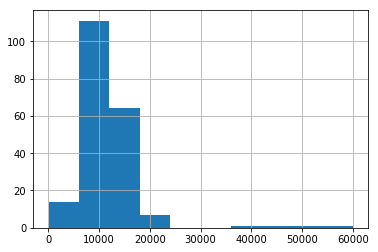

In [17]:
%matplotlib inline
df['price'].hist()